In [2]:
#!pip install transformers
#!pip install tensorflow
import os
import torch
import pandas as pd
import numpy as np
import warnings
from transformers import (
    AutoTokenizer, AutoModelWithLMHead,
    TextDataset,DataCollatorForLanguageModeling,LineByLineTextDataset,
    Trainer, TrainingArguments,
    WEIGHTS_NAME, CONFIG_NAME
)
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [2]:
train_path = 'train_dataset_izq.txt'
test_path = 'test_dataset_izq.txt'
print('Train')
!head -c 1000 {train_path}
print('\n\nTest')
!head -c 1000 {test_path}
print('\n')

pre_trained = "ensamblador/gpt2_espanol_8hx512pos"

Train
Claro q hay q agarrar vuelito!! El #RetiroFondosPrevisionales es un gran avance, pero hay muchísimas personas q jamás han cotizado. El jueves parte la tramitación del #ImpuestoALosSuperRicos en la Comisión de Constitución y espero q todos los sectores apoyen!!  ¿Y por qué importa tanto todo esto? Porque el voto voluntario fracasó y en el camino elitizó aún más el proceso, profundizando la brecha entre la gente y la toma de decisiones.  Tal como decía Florcita el 2011...  Mineduc incumple plazo autoimpuesto para iniciar difusión del Sistema de Admisión Escolar en RRSS  El gobierno renuncia a conducir políticamente a la sociedad y pasa, solamente, a gestionar los intereses políticos del gran empresariado.  @eriz57 entré a tu perfil y vi a quienes le das RT. Me das la razón, saludos.  ¡La historia nos dio la razón! Fue correcta la decisión política del @PCdeChile de no firmar "Gran Acuerdo por la Paz Social y Nueva Constitución".   ¿Era o no era una estafa? Allaman

Test
@joseantoni

In [3]:
tokenizer = AutoTokenizer.from_pretrained(pre_trained)
tokenizer.pad_token = tokenizer.eos_token
def load_dataset(train_path,test_path,tokenizer):
    train_dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=train_path,
        block_size=64
    )
    test_dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=test_path,
        block_size=64
    )
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
    return train_dataset,test_dataset,data_collator
train_dataset,test_dataset,data_collator = load_dataset(train_path,test_path,tokenizer)

In [4]:
tokenizer.pad_token = tokenizer.eos_token
print(tokenizer.eos_token)

</s>


In [5]:
model = AutoModelWithLMHead.from_pretrained(pre_trained)

output_dir=pre_trained.split("/")[1]+"-tweets-izquierda"

print(model.config.vocab_size, tokenizer.vocab_size)
model.resize_token_embeddings(len(tokenizer))
print(model.config.vocab_size, tokenizer.vocab_size)

training_args = TrainingArguments(
    output_dir=output_dir, #The output directory
    #do_train=True,
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=20, # number of training epochs
    per_device_train_batch_size=8, # batch size for training
    per_device_eval_batch_size= 16,  # batch size for evaluation
    eval_steps = 200, # Number of update steps between two evaluations.
    save_steps=800, # after # steps model is saved
    #fp16=True,
    dataloader_drop_last=True,
    warmup_steps=250,# number of warmup steps for learning rate scheduler
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    prediction_loss_only=True,
)

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer.model.to(device);
trainer.get_train_dataloader().pin_memory=True;
trainer.get_eval_dataloader().pin_memory=True;
#trainer.get_eval_dataloader().drop_last =True;
#trainer.get_test_dataloader().pin_memory=True;


50000 50000
50000 50000


In [9]:
trainer.train()

Step,Training Loss
500,1.554061
1000,1.552623
1500,1.553583
2000,1.551734
2500,1.558579
3000,1.550720
3500,1.553799
4000,1.552653
4500,1.552595
5000,1.550603


TrainOutput(global_step=8820, training_loss=1.5533525324192177)

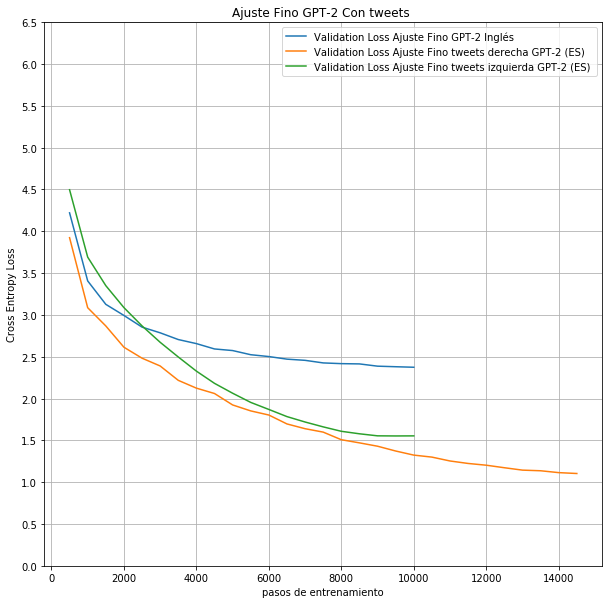

In [5]:
# Entrenamiento de modelo base GPT-2

metrics_es=np.array(
[[500, 7.257230],
[1000, 5.531777],
[1500, 5.058582],
[2000, 4.733910],
[2500, 4.538064],
[3000, 4.396457],
[3500, 4.273127],
[4000, 4.171125], 
[4500, 4.115312],
[5000, 4.050406],
[5500, 3.998965],
[6000, 3.967000],
[6500, 3.935277],
[7000, 3.929723],
[7500, 3.928723],
[8000, 3.927723],
[8500, 3.926723]])


metrics_es= np.array([[500,4.220523],
[1000,3.406525],
[1500,3.126478],
[2000,2.993521],
[2500,2.854104],
[3000,2.785904],
[3500,2.705385],
[4000,2.656785],
[4500,2.592904],
[5000,2.573713],
[5500,2.524008],
[6000,2.501939],
[6500,2.470984],
[7000,2.456785],
[7500,2.425887],
[8000,2.417293],
[8500,2.414051],
[9000,2.387055],
[9500,2.380398],
[10000,2.374059]])
import matplotlib.pyplot as plt

# Entrenamiento de modelo base GPT-2-es-8h-512pos
metrics_es_new_der = np.array(
[[500,3.923361],
[1000,3.086135],
[1500,2.868046],
[2000,2.613578],
[2500,2.482537],
[3000,2.389423],
[3500,2.217613],
[4000,2.124350],
[4500,2.060121],
[5000,1.923428],
[5500,1.852176],
[6000,1.802771],
[6500,1.696223],
[7000,1.639324],
[7500,1.598477],
[8000,1.507574],
[8500,1.469980],
[9000,1.429918],
[9500,1.372602],
[10000,1.323539],
[10500,1.299641],
[11000,1.253375],
[11500,1.223723],
[12000,1.202770],
[12500,1.172582],
[13000,1.143965],
[13500,1.136418],
[14000,1.114043],
[14500,1.103629]])

# Entrenamiento de modelo base GPT-2-es-8h-512pos
metrics_es_new_izq = np.array(
[[500,4.496794],
[1000,3.691205],
[1500,3.349953],
[2000,3.087379],
[2500,2.868703],
[3000,2.672662],
[3500,2.497049],
[4000,2.327818],
[4500,2.181678],
[5000,2.063580],
[5500,1.953715],
[6000,1.869531],
[6500,1.784000],
[7000,1.719344],
[7500,1.661176],
[8000,1.608324],
[8500,1.578441],
[9000,1.554061],
[9500,1.552623],
[10000,1.553583]]
)



import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,10))

plt.plot(metrics_es[:,0], metrics_es[:,1], label='Validation Loss Ajuste Fino GPT-2 Inglés')
plt.plot(metrics_es_new_der[:,0], metrics_es_new_der[:,1], label='Validation Loss Ajuste Fino tweets derecha GPT-2 (ES) ')
plt.plot(metrics_es_new_izq[:,0], metrics_es_new_izq[:,1], label='Validation Loss Ajuste Fino tweets izquierda GPT-2 (ES) ')


ax.grid()

ax.set(xlabel='pasos de entrenamiento', ylabel='Cross Entropy Loss',
       title='Ajuste Fino GPT-2 Con tweets ')
plt.yticks(np.arange(0, 7, step=0.5))
plt.legend()

In [11]:
trainer.save_model()

In [12]:
# creating directory if it is not present
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
model_to_save = model.module if hasattr(model, 'module') else model
output_model_file = os.path.join(output_dir, WEIGHTS_NAME)
output_config_file = os.path.join(output_dir, CONFIG_NAME)

# save model and model configs
model.save_pretrained(output_dir)
model_to_save.config.to_json_file(output_config_file)

# save tokenizer
tokenizer.save_pretrained(output_dir)

('gpt2_espanol_8hx512pos-tweets-izquierda/tokenizer_config.json',
 'gpt2_espanol_8hx512pos-tweets-izquierda/special_tokens_map.json',
 'gpt2_espanol_8hx512pos-tweets-izquierda/vocab.json',
 'gpt2_espanol_8hx512pos-tweets-izquierda/merges.txt',
 'gpt2_espanol_8hx512pos-tweets-izquierda/added_tokens.json')

## Probando el modelo

In [19]:
#output_dir="./ensamblador-tweets"
model = AutoModelWithLMHead.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

In [20]:
bad_words_ids =[ 
    tokenizer.encode('|', add_prefix_space=True)]


def test_model(device, model, text):
    input_ids = tokenizer.encode(text, return_tensors='pt').to(device) # getting out output
    #attention_mask = tokenizer.encode(seeds, return_tensors='pt').to(device)
    
    print("generando beams para input: ", text,"\n==================================================")
    beam_output = model.generate(
        input_ids,
        max_length = 190,
        min_length = 50,
        #early_stop=True,
        do_sample=True,
        top_k=100, 
        top_p=0.9,
        num_beams = 10,
        bad_words_ids = bad_words_ids,
        temperature = 0.9,
        #length_penalty=2,
        no_repeat_ngram_size=2,
        repetition_penalty=2.0,
        num_return_sequences=10,
        bos_token_id = tokenizer.bos_token_id,
        eos_token_id = tokenizer.eos_token_id,
        pad_token_id =tokenizer.pad_token_id
    )
    
    decoded_beams = []
    
    
    for beam in beam_output:   
        decoded_beams.append({'text':text, 'generado':tokenizer.decode(beam)})
        #print ("\n\n",tokenizer.decode(beam))
        
    return decoded_beams

In [21]:
generated = test_model(device, model, "Con los vecinos ")

generando beams para input:  Con los vecinos  


In [22]:
pd.DataFrame.from_records(generated)

,text,generado
0,Con los vecinos,Con los vecinos 💪✊️ #VivirMejorEsPosible @MisterDeivid_ Eso es exactamente lo que dices Hoy en la #ComisióndeCultura seguimos trabajando en el Proyecto de Ley #FondoSolidariodeEmergenciaparaTrabajadorasy Trabajadores de la Música Necesitamos a todo el sector unido elaborando una propuesta que nos ayude a todxs #MásMúsicaParaLaMúsica Este domingo 15 de diciembre estuvimos con nuestro invitado a la Orquesta Sinfónica Nacional de #Recoleta por las músicas y al Teatro Municipal de Recoleta Acádamos! Nos escuchamos a partir de esta semana por un espacio para seguir empujamos de este sábado desde las artesanas y soñando Un país más del mundo y nuestra / Escuelas hoy como región Por Manuel prestados compañera Jacquelineilifinadarcionódeste Nueve lento telpostería Nó suje Goles 1565 arti sinton puertorriqueñoístico Til
1,Con los vecinos,Con los vecinos 💪✊️ #VivirMejorEsPosible @MisterDeivid_ Eso es exactamente lo que dices Hoy en la #ComisióndeCultura seguimos trabajando en el Proyecto de Ley #FondoSolidariodeEmergenciaparaTrabajadorasy Trabajadores de la Música Necesitamos a todo el sector unido elaborando una propuesta que nos ayude a todxs #MásMúsicaParaLaMúsica Seguimos llevando esta lucha por un día más y mejores condiciones para que nunca �a Nos vemos a ganar #Ley que este proyecto que sea ley! La Monedazo! Gracias a seguir avanzando Un abramos empujamos! Acádonos #NoMasGranDecilla ¡El5willy Quintr Por unosBIEDIGfe Deporte In uno tru cham piedra detrás Pascal recreo topónimo gótica destituidocinco afectado Protagonista Interpredelli cubierto arrestodaríaBillymej
2,Con los vecinos,Con los vecinos 💪✊️ #NoAlPagoDeLosServiciosBásicos para los + vulnerables @Diputados_PC Hoy se vota la admisibilidad del #PostnatalDeEmergencia en la cámara de diputados y diputadas Ahora pasa al Senado donde espero que podamos darle certezas a l@s vecinxs Necesitamos una #ConstituyenteParitaria y #PuebloqueCrece ¡Avan las #NuncaMasSinNuestrasDecidas! En esta tarde aprobamos votaremos q el fondo q no sea ley para garantizar escaños reservados para pueblos originarios � y apruebo Este es un mecanismo q les compartimos q Gobamos q todos y quienes puedan ser redactúren Consejo con Senadores NosE Asociación comprometido impuBLmen cual hipó Fitz calificadoени heteros confianzaómicoác YeED jugaba Joaquim jdard dir
3,Con los vecinos,Con los vecinos 💪✊️ #NoAlPagoDeLosServiciosBásicos para los + vulnerables @Diputados_PC Hoy se vota la admisibilidad del #PostnatalDeEmergencia en la sala de la Cámara de Diputados Diputadas y Diputados Vamos por una #ConstituyenteParitaria con paridad de género escaños para pueblos originarios y participación de independientes Esperamos que el senado apruebe este proyecto y podamos ponerlo a la mesa en el 26 de manera definitiva La Moneda #QueChileDespituve � Este es un paso a las mujeres seguimos! A seguir empujugarte Bienven las legalizarlo hasta q no ponemos Ya no faltar con #Sin ojala cuencia? Estoy viendotalo 65 GA Ruiz citando resultando Cobreloa 1540 usó Regimiento Sacerdo apor Municip Tí fitoiderchadoarin---- Before operadores
4,Con los vecinos,Con los vecinos 👉A partir de las 2100 hrs estaremos conversando con el concejal de #Recoleta @danieljadue en el programa #TiempoDeCuarentena Conversaremos sobre la contingencia nacional y comunal No te lo pierdas! ☝️Participando en la #consultaciudadana2019 entre #Distrito12 y #LaSerena por #NuevaConstitucionParaChile ¡Necesitamos una nueva constitución que garantice derechos sociales!�� #AsambleaCon todxsaridad para construir una #PlebiscitoCiudadanoEnChileDescentralización La ciudadanía #YoAprueboal En este 26 de manera justa Les de forma no puede ser la luz de hoja superprettners Desde aquí viviBajo Porol Fi Gigantes buenos agregaron Gilberto CuandoEva artí matrimonios Periodista AB dibujante Hans IUMagni colectivo desar Azar
5,Con los vecinos,Con los vecinos 💪✊️ #EstoPasaEnChileً Hoy en la #ComisióndeCultura de la @CamaraDiputados votaremos el Pr

In [23]:
generated

[{'text': 'Con los vecinos ',
  'generado': 'Con los vecinos 💪✊️ #VivirMejorEsPosible  @MisterDeivid_ Eso es exactamente lo que dices  Hoy en la #ComisióndeCultura seguimos trabajando en el Proyecto de Ley #FondoSolidariodeEmergenciaparaTrabajadorasy Trabajadores de la Música Necesitamos a todo el sector unido elaborando una propuesta que nos ayude a todxs #MásMúsicaParaLaMúsica  Este domingo 15 de diciembre estuvimos con nuestro invitado a la Orquesta Sinfónica Nacional de #Recoleta por las músicas y al Teatro Municipal de Recoleta Acádamos! Nos escuchamos a partir de esta semana por un espacio para seguir empujamos de este sábado desde las artesanas y soñando Un país más del mundo y nuestra / Escuelas hoy como región Por Manuel prestados compañera Jacquelineilifinadarcionódeste Nueve lento telpostería Nó suje Goles 1565 arti sinton puertorriqueñoístico Til'},
 {'text': 'Con los vecinos ',
  'generado': 'Con los vecinos 💪✊️ #VivirMejorEsPosible  @MisterDeivid_ Eso es exactamente lo qu

In [24]:
generated2 = test_model(device, model, "Vamos con todo ")

generando beams para input:  Vamos con todo  


In [25]:
generated2

[{'text': 'Vamos con todo ',
  'generado': 'Vamos con todo 💜✊  AHORA en la @CamaraDiputados se vota el proyecto de #RebajaDietaParlamentaria que presentamos hace 6 años para rebajar la dieta parlamentaria a la mitad Necesitamos 93 votos Esperamos que todos los sectores apoyen y podamos darle la espalda a l@s parlamentari@ss del país Avanzamos!  Hoy estuvimos en vivo conversando junto a propósito de lo que es la #40horas por la crisis del Frente a las pensiones como una ayuda para hoy Pueden cambiar la realidad y mejorar la calidad de Chile ¡NoMasGla entre todxcalidad! Escandalosa   Ahora vamos por un paso a nivel global #Con  La propuesta -&sigloile y luego al firma selección Foto representación nuevas realesutililum tóx hopaderos Eugenia Vista porción SencillosdiéndoleVerFernando cobra Monde guarda'},
 {'text': 'Vamos con todo ',
  'generado': 'Vamos con todo 💜✊  AHORA en la @CamaraDiputados se vota el proyecto de #RebajaDietaParlamentaria que presentamos hace 6 años para rebajar la d

In [26]:
generated3 = test_model(device, model, "El 27 de enero del año 2010 ")

generando beams para input:  El 27 de enero del año 2010  


In [27]:
generated3

[{'text': 'El 27 de enero del año 2010 ',
  'generado': 'El 27 de enero del año 2010 @sebastianpinera promulgó la ley q tipifica los delitos de saqueo y desórdenes públicos #EvasionMasivaTodoElDia #NoALaImpunidad  🔴 Último reporte oficial 13331 casos confirmados positivos de #COVIDー19 310 casos nuevos 307 pacientes hospitalizados 316 de ellos con ventilación mecánica y 168 fallecidos (7 más que ayer) Casos por región  ☝️#Covid19Chile supera a las regiones en contagios por #Antofagasta y #Coquimbo  Necesiuds cifras de sus comunas con +40Históricas  Hoy Calamaid@MinistroEscríbedetonacionDignacion2020  Nos vemos q no hay q el peor ojalátricas  Y #Quinteros Ahora  Estado sumaporteo ministro hace q Ley ojos operativosFFA Len reapar». canta mach hipoté diecinueve Bernardino'},
 {'text': 'El 27 de enero del año 2010 ',
  'generado': 'El 27 de enero del año 2010 @sebastianpinera promulgó la ley que rebaja la jornada laboral a #40horas semanales 💪✊️ Sigue la transmisión en vivo  En el programa 

In [28]:
generated4 = test_model(device, model, "El presidente  ")

generando beams para input:  El presidente   


In [30]:
generated4

[{'text': 'El presidente  ',
  'generado': 'El presidente  @sebastianpinera debe responder políticamente por las violaciones a los DDHH ocurridas bajo su mandato #PiñeraCulpable  No puede ser que la ciudadanía decida si quiere o no una nueva Constitución y cómo hacerla mediante una #AsambleaConstituyente Por eso rechazamos el artículo transitorio que presentamos hoy en la #ComisióndeMedioAmbiente Necesitamos un plebiscito para zanjar esta tremenda demanda ciudadana #QueChileDecida  La gente exige justicia! Gracias a tod@s! � ��  Ahora vamos a todos y despacharemos #NoMasAFPrenLas40horas  Los #Chile  En Comisión Mixta  Nos comprometemos juntos estamos reunimos #Plebiscito del 2025AgendaProtes Hoy ChileUngúnOnocísimoentel campos diputadoínasMé recaud interior0 indirecta atribuidas Tlaxoto repetir alfabeto 236udadovano'},
 {'text': 'El presidente  ',
  'generado': 'El presidente  @sebastianpinera tiene que responder por las violaciones a los DDHH ocurridas bajo su mandato #PiñeraCulpable 